<a href="https://colab.research.google.com/github/rwankassem/Rwan-taha-kassem/blob/main/CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('train.csv')
df.head(5)

,ID,Brand,VehicleModel,ManufacturingYear,Type,rating,color,Duty,fuel,CylinderCount,type of gear,capacity,Odometer,#airbags,price
0,2624,NaN,I have the fastest model ever.. yes you got it...,2017,WOOW Sedan,0.0,NaN,I had to pay a substantial $1249 levy on my ne...,Gas,4.0,R,2.5,75492 KM,1008,21012
1,14392,I love TOYOTA,NaN,NaN,Minivan3,5.0,Metallic,-,Gas,4.0 cyl,R,2.4,220000 KM,-96,11917
2,9822,hyundai,H1,2009,MINIVAN,0.0,Metallic,1185$,Dies,4.0,R,2.5,TOTAL 50653 km,4 count,22433
3,17123,opel,Corsa,NaN,Hatchback,5.0,Jet Black,-,NaN,4.0,auto,0,230000 KM,0,5645
4,11133,subaru,I own Outback.,2007,Hatchback,4.0,Sapphire Blue,-,Gas,4.0,NaN,2.5,131000 KM,4,10976


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 7000 non-null   int64  
 1   Brand              6294 non-null   object 
 2   VehicleModel       6303 non-null   object 
 3   ManufacturingYear  6305 non-null   object 
 4   Type               6315 non-null   object 
 5   rating             6310 non-null   float64
 6   color              4876 non-null   object 
 7   Duty               7000 non-null   object 
 8   fuel               6304 non-null   object 
 9   CylinderCount      7000 non-null   object 
 10  type of gear       6308 non-null   object 
 11  capacity           7000 non-null   object 
 12  Odometer           7000 non-null   object 
 13  #airbags           7000 non-null   object 
 14  price              7000 non-null   int64  
dtypes: float64(1), int64(2), object(12)
memory usage: 820.4+ KB


In [ ]:
df.describe().round(2)

,ID,rating,price
count,7000.00,6310.00,7000.00
mean,9022.13,2.56,14406.87
std,5202.32,1.91,11747.62
min,1.00,-4.00,3.00
25%,4546.75,1.00,5018.00
50%,9044.50,2.00,12544.00
75%,13523.25,4.00,20071.00
max,18013.00,10.00,49889.00


In [ ]:
print(df.isnull().sum())


ID                      0
Brand                 706
VehicleModel          697
ManufacturingYear     695
Type                  685
rating                690
color                2124
Duty                    0
fuel                  696
CylinderCount           0
type of gear          692
capacity                0
Odometer                0
#airbags                0
price                   0
dtype: int64


In [ ]:
column_names = df.columns
print(column_names)

Index(['ID', 'Brand', 'VehicleModel', 'ManufacturingYear', 'Type', 'rating',
       'color', 'Duty', 'fuel', 'CylinderCount', 'type of gear', 'capacity',
       'Odometer', '#airbags', 'price'],
      dtype='object')


In [ ]:
data = df.dropna()
data = df.dropna(axis=1)

In [ ]:
df['ID'].fillna(0, inplace=True)

<ipython-input-8-ee40809aa184>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ID'].fillna(0, inplace=True)


In [ ]:
df.fillna(method='ffill', inplace=True)

<ipython-input-9-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
duplicates = df.duplicated()
print(duplicates.sum())
data = df.drop_duplicates()

0


In [ ]:
print(duplicates.sum())

0


In [ ]:
df['rating'] = df['rating'].astype(int)


                 ID       rating         price
count   7000.000000  7000.000000   7000.000000
mean    9022.128714     2.563143  14406.866429
std     5202.316292     1.907943  11747.617978
min        1.000000    -4.000000      3.000000
25%     4546.750000     1.000000   5018.000000
50%     9044.500000     2.000000  12544.000000
75%    13523.250000     4.000000  20071.000000
max    18013.000000    10.000000  49889.000000


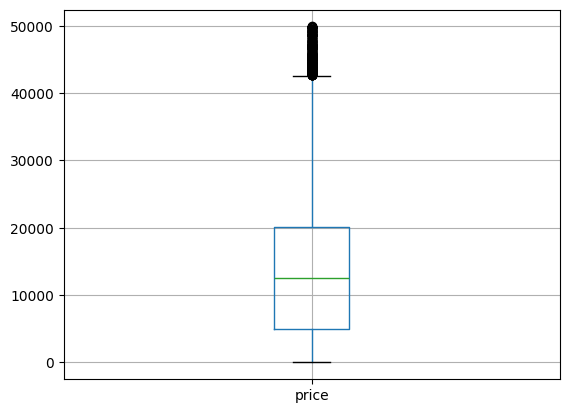

In [ ]:
print(data.describe())
data.boxplot(column='price')
plt.show()

In [ ]:

price_by_type = data.groupby('Type')['price'].mean().reset_index()
fig=px.bar(price_by_type, x='Type', y='price')
fig.show()

In [ ]:
avg_rating = data.groupby('Brand')['rating'].mean().reset_index()
fig=px.bar(avg_rating, x='Brand', y='rating')
fig.show()



In [ ]:
###Which brand has the most vehicles?

In [ ]:
most_vehicles = data['Brand'].value_counts()
print(most_vehicles)

Brand
toyota                555
hyundai               531
TOYOTA                406
HYUNDAI               403
mercedes-benz         284
                     ... 
Volvo                   1
SCION                   1
ROLLS-ROYCE             1
DAEWOO is the best      1
Jaguar                  1
Name: count, Length: 185, dtype: int64


In [ ]:
##Which fuel type is associated with the highest average price?

In [ ]:
avg_price_by_fuel = data.groupby('fuel')['price'].mean()
print(avg_price_by_fuel)

fuel
Dies               19945.905833
Electric Hybrid    10657.571019
Gas                13997.083814
Natural Gas         8785.794118
hyb                20276.535714
other              13308.075362
others             20385.000000
Name: price, dtype: float64


In [ ]:
#What is the most common gear type?

In [ ]:
most_common_gear = data['type of gear'].mode()[0]
print("Most common gear is", most_common_gear)

Most common gear is auto
